In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('data/stud.csv')

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Checking Missing Values

In [12]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the dataset

### Check  Duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

There is no Duplicate records in dataset

### Checking Data Types

In [16]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### Checking unique values

In [ ]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

df.describe()

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
print("Categories in 'gender' variables:",end=" ")
print(df['gender'].unique())

print("Categories in 'race ethnicity' variables:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of eduction ' variables:",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variables is: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variables:",end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variables: ['female' 'male']
Categories in 'race ethnicity' variables: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of eduction ' variables: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables is:  ['standard' 'free/reduced']
Categories in 'test preparation course' variables: ['none' 'completed']


In [35]:
numerial_features=[features for features in df.columns if df[features].dtype!='O']
categorical_features=[features for features in df.columns if df[features].dtype=='O']

In [36]:
print("Numerical features in data set are :",end=" ")
print(numerial_features)

print("Categorical features in data set are :",end=" ")
print(categorical_features)

Numerical features in data set are : ['math_score', 'reading_score', 'writing_score']
Categorical features in data set are : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [37]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=df['Total_Score']/3

In [38]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
reading_full=df[df['reading_score']==100]['Average'].count()
writing_full=df[df['writing_score']==100]['Average'].count()
math_full=df[df['math_score']==100]['Average'].count()
print(f"Number of students got full marks in reading are {reading_full}")
print(f'NUmber of studets got full marks in writing are {writing_full}')
print(f'Number of students got full marks in math are {math_full}')

Number of students got full marks in reading are 17
NUmber of studets got full marks in writing are 14
Number of students got full marks in math are 7


In [57]:
df[df['reading_score']==100].count()

gender                         17
race_ethnicity                 17
parental_level_of_education    17
lunch                          17
test_preparation_course        17
math_score                     17
reading_score                  17
writing_score                  17
Total_Score                    17
Average                        17
dtype: int64

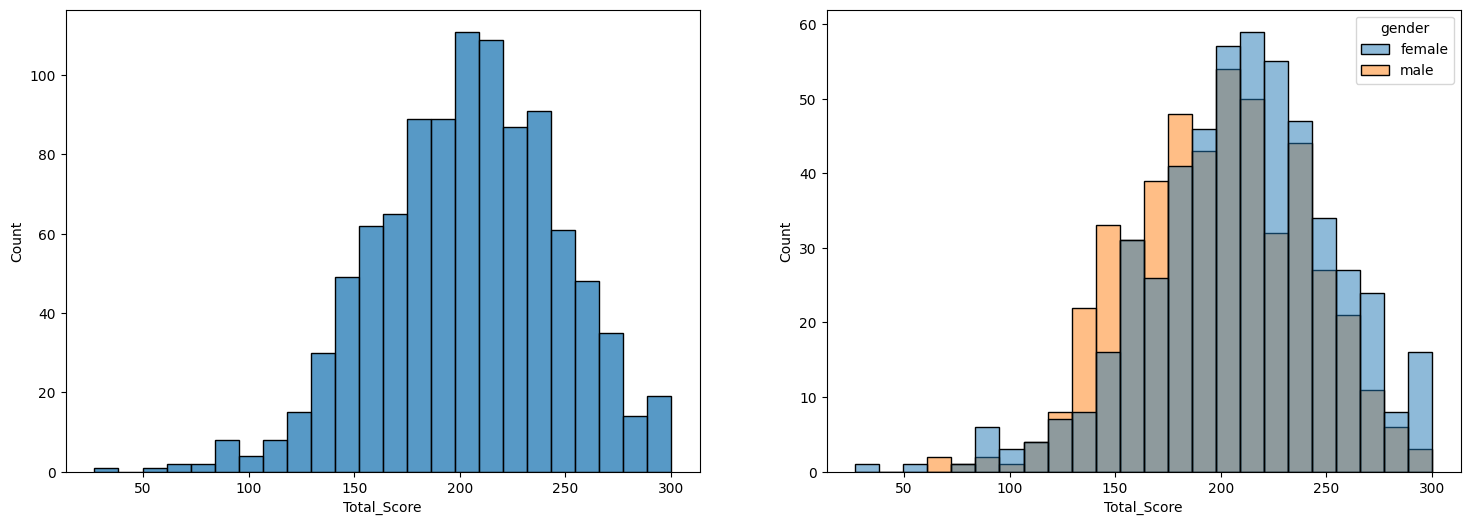

In [68]:
fig,axs=plt.subplots(1,2,figsize=(18,6))
plt.subplot(121)
sns.histplot(data=df,x="Total_Score")

plt.subplot(122)
sns.histplot(data=df,x='Total_Score',hue="gender")
plt.show()